In [11]:
from fastbook import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [4]:
# Define image dimensions and other parameters
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

# Define paths to your training data
train_data_dir = "archive/Training"
train_female_dir = "archive/Training/female"
train_male_dir = "archive/Training/male"

# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [6]:

# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Since it's binary classification (0 for female, 1 for male)
)

Found 47009 images belonging to 2 classes.


In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [13]:
from fastbook import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define image dimensions and other parameters
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

# Define paths to your training data
train_data_dir = "archive/Training"
train_female_dir = "archive/Training/female"
train_male_dir = "archive/Training/male"

# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Since it's binary classification (0 for female, 1 for male)
)


# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)


Found 47009 images belonging to 2 classes.
Epoch 1/10
1470/1470 [==============================] - 140s 94ms/step - loss: 0.2719 - accuracy: 0.8853
Epoch 2/10
1470/1470 [==============================] - 121s 82ms/step - loss: 0.1763 - accuracy: 0.9347
Epoch 3/10
1470/1470 [==============================] - 119s 81ms/step - loss: 0.1561 - accuracy: 0.9420
Epoch 4/10
1470/1470 [==============================] - 118s 80ms/step - loss: 0.1411 - accuracy: 0.9486
Epoch 5/10
1470/1470 [==============================] - 120s 81ms/step - loss: 0.1354 - accuracy: 0.9502
Epoch 6/10
1470/1470 [==============================] - 124s 84ms/step - loss: 0.1294 - accuracy: 0.9532
Epoch 7/10
1470/1470 [==============================] - 126s 86ms/step - loss: 0.1247 - accuracy: 0.9548
Epoch 8/10
1470/1470 [==============================] - 125s 85ms/step - loss: 0.1184 - accuracy: 0.9579
Epoch 9/10
1470/1470 [==============================] - 124s 84ms/step - loss: 0.1137 - accuracy: 0.9596
Epoch 10/10


In [16]:
# Save the trained model
model.save("gender_classification_model.h5")

NotImplementedError: 
Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

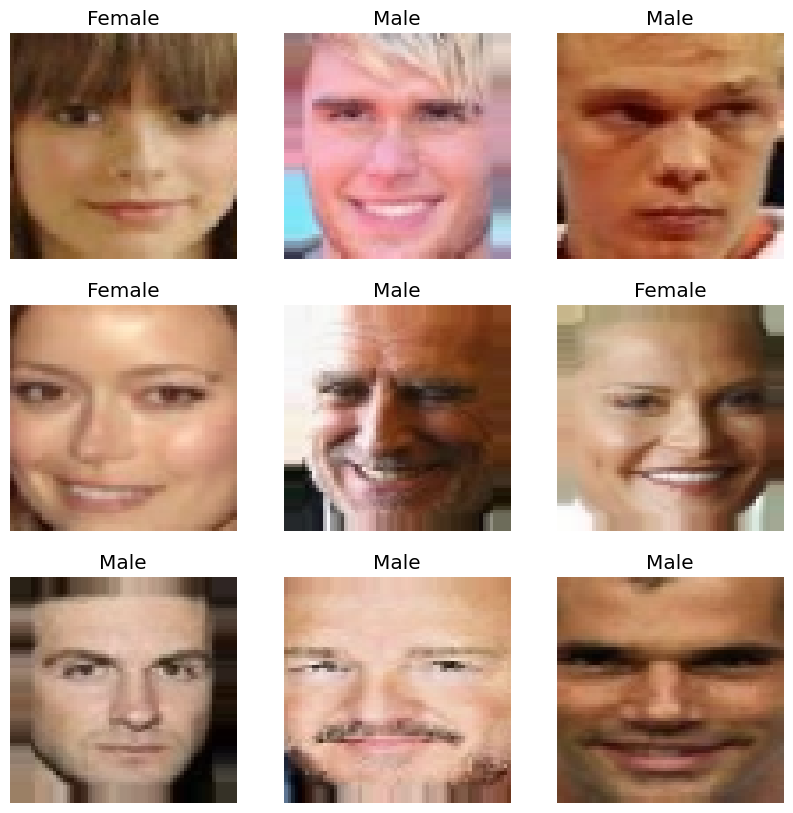

In [17]:
# Load some preprocessed images for visualization
sample_images, sample_labels = next(train_generator)

# Visualize the preprocessed images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    if sample_labels[i] == 0:
        plt.title("Female")
    else:
        plt.title("Male")
    plt.axis("off")
plt.show()

In [25]:

# Define paths to your validation data
validation_data_dir = "archive/Validation"

# Use ImageDataGenerator for preprocessing (no augmentation for validation data)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and prepare validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Since it's binary classification (0 for female, 1 for male)
)

# Load the trained model
#model = tf.keras.models.load_model("gender_classification_model.h5")

# Evaluate the model on the validation data
evaluation = model.evaluate(validation_generator)

print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

Found 11649 images belonging to 2 classes.
365/365 [==============================] - 5s 14ms/step - loss: 0.0898 - accuracy: 0.9670
Validation Loss: 0.08983436971902847
Validation Accuracy: 0.9670357704162598
